In [213]:
# import EDA all tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [38]:
df = pd.read_csv('../../dataset/Student_Performance.csv')
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91
1,4,82,4,2,65
2,8,51,7,2,45
3,5,52,5,2,36
4,7,75,8,5,66
...,...,...,...,...,...
9995,1,49,4,2,23
9996,7,64,8,5,58
9997,6,83,8,5,74
9998,9,97,7,0,95


In [39]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [40]:
df['Performance Index'].value_counts()

Performance Index
67     187
45     185
56     181
49     181
40     180
      ... 
14       7
99       6
11       5
100      3
10       1
Name: count, Length: 91, dtype: int64

In [41]:
# lets drop one unnecessery columns
df.drop(columns=["Sample Question Papers Practiced"], axis=1, inplace=True)

In [42]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Performance Index
0,7,99,9,91
1,4,82,4,65
2,8,51,7,45
3,5,52,5,36
4,7,75,8,66


In [43]:
df.rename(columns={'Hours Studied': 'study_hour', "Previous Scores": "previus_score", "Sleep Hours": "sleep_hours", "Performance Index": "performance"}, inplace=True)

In [72]:
df

,study_hour,previus_score,sleep_hours,performance
0,7,99,9,91
1,4,82,4,65
2,8,51,7,45
3,5,52,5,36
4,7,75,8,66
...,...,...,...,...
9995,1,49,4,23
9996,7,64,8,58
9997,6,83,8,74
9998,9,97,7,95


In [86]:
df['study_hour'].value_counts()

study_hour
1    1152
6    1133
7    1129
3    1119
9    1115
5    1094
8    1088
4    1085
2    1085
Name: count, dtype: int64

In [93]:
study_df_agg = df.groupby('study_hour')['performance'].mean().reset_index()
study_df_agg

,study_hour,performance
0,1,44.116319
1,2,46.428571
2,3,49.776586
3,4,52.719816
4,5,55.516453
5,6,58.486320
6,7,60.233835
7,8,64.211397
8,9,65.725561


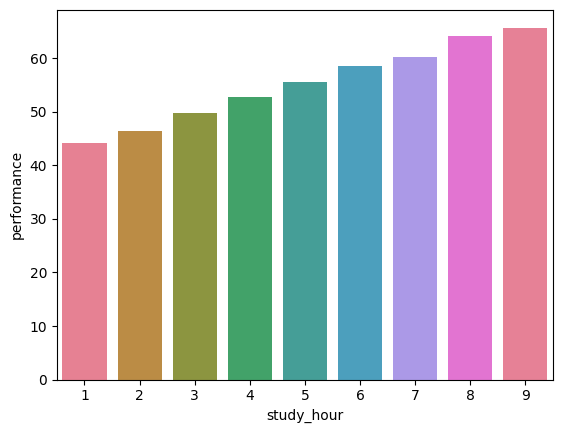

In [91]:
# lets see plot study hour relation with performance 
study_df_agg = df.groupby('study_hour')['performance'].mean().reset_index()
sns.barplot(data=study_df_agg, x='study_hour', y="performance", palette="husl", hue="study_hour", legend=False);

In [57]:
df['sleep_hours'].value_counts()

sleep_hours
8    1804
7    1676
6    1673
9    1622
4    1619
5    1606
Name: count, dtype: int64

In [102]:
df_agg = df.groupby('sleep_hours')['performance'].mean().reset_index()
df_agg.max()

sleep_hours     9.000000
performance    56.811344
dtype: float64

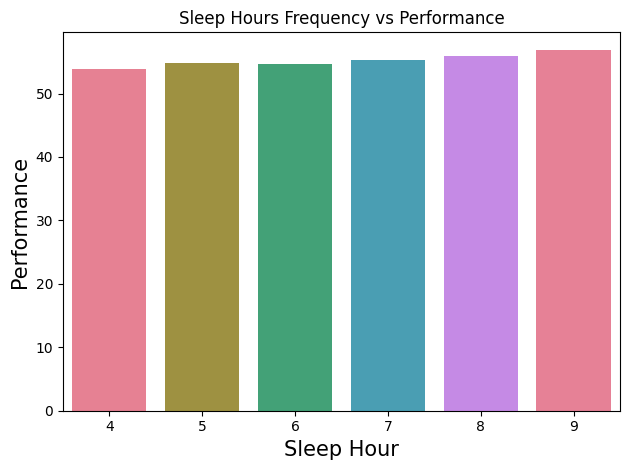

In [101]:
# lets see visualize the frequency of sleep hours vs performance
df_agg = df.groupby('sleep_hours')['performance'].mean().reset_index()
sns.barplot(data=df_agg, x='sleep_hours', y="performance", palette="husl", hue="sleep_hours", legend=False);
plt.title("Sleep Hours Frequency vs Performance")
plt.xlabel("Sleep Hour", fontsize=15)
plt.ylabel("Performance", fontsize=15)
plt.tight_layout();

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   study_hour     10000 non-null  int64
 1   previus_score  10000 non-null  int64
 2   sleep_hours    10000 non-null  int64
 3   performance    10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


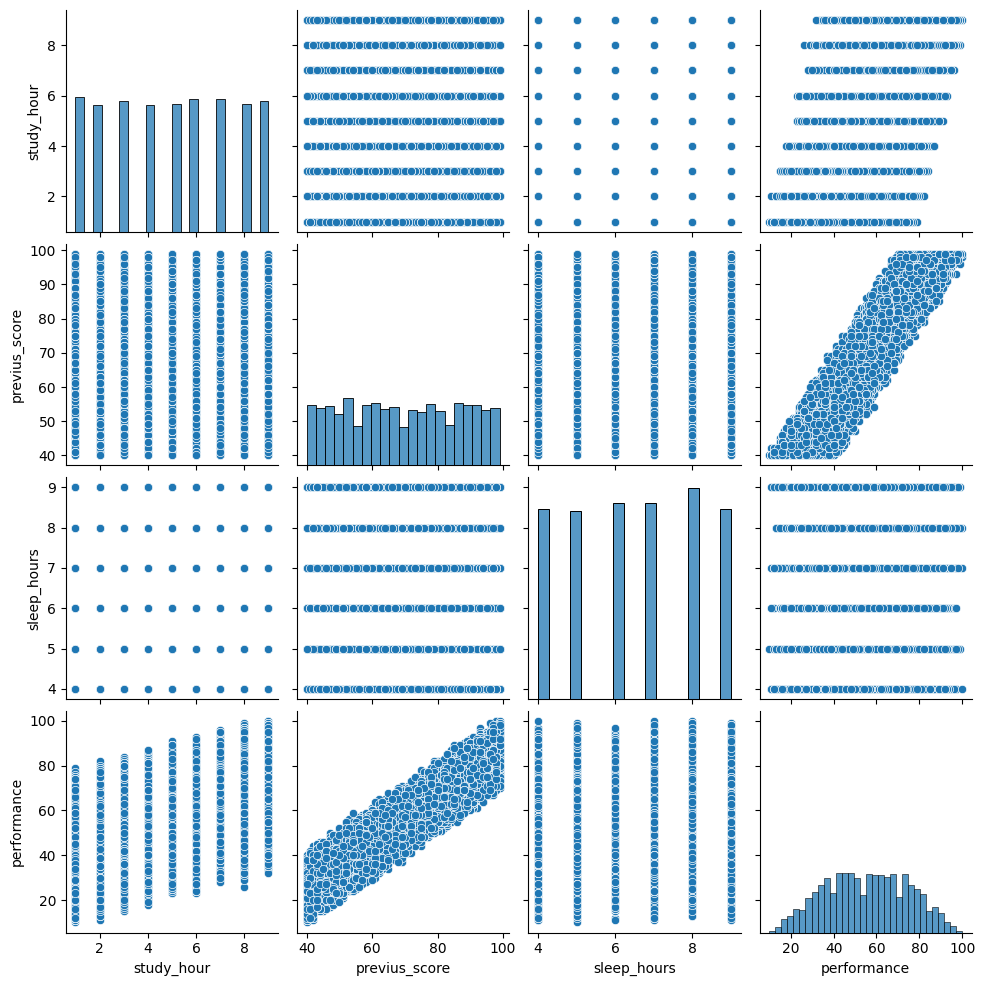

In [106]:
sns.pairplot(df);

In [107]:
df.corr()

,study_hour,previus_score,sleep_hours,performance
study_hour,1.000000,-0.012390,0.001245,0.373730
previus_score,-0.012390,1.000000,0.005944,0.915189
sleep_hours,0.001245,0.005944,1.000000,0.048106
performance,0.373730,0.915189,0.048106,1.000000


<Axes: >

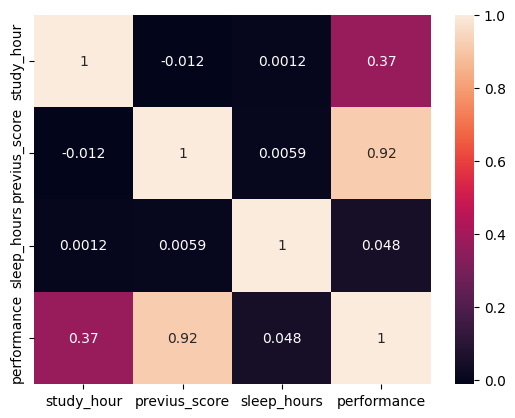

In [108]:
sns.heatmap(df.corr(), annot=True)

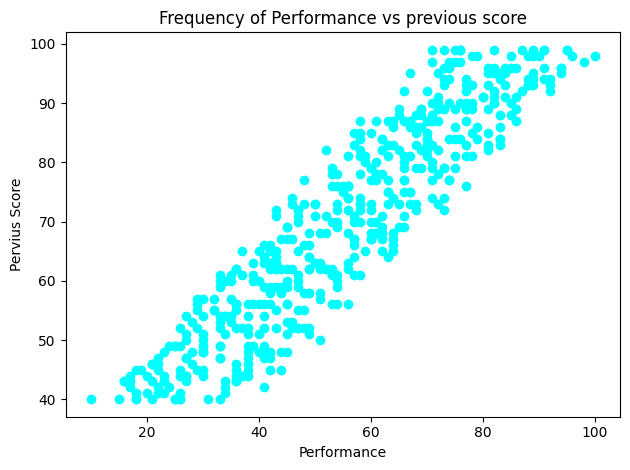

In [125]:
# better relation with performance and previus score
plt.scatter(df['performance'][:500], df['previus_score'][:500], color="cyan");
plt.title("Frequency of Performance vs previous score")
plt.xlabel('Performance')
plt.ylabel('Pervius Score')
plt.tight_layout();

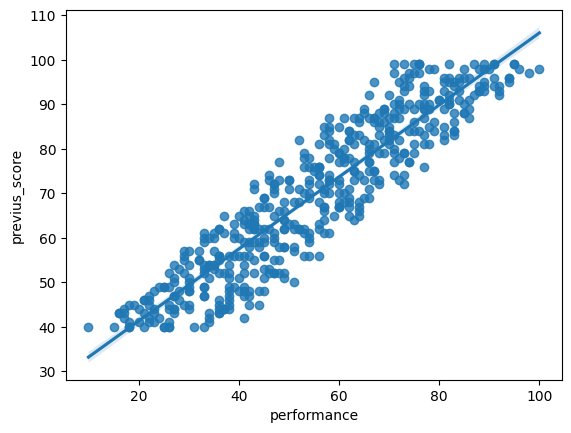

In [133]:
sns.regplot(data=df, x=df['performance'][:500], y=df['previus_score'][:500]);

In [119]:
df.head(3)

,study_hour,previus_score,sleep_hours,performance
0,7,99,9,91
1,4,82,4,65
2,8,51,7,45


In [120]:
# Create x and y
X = df.drop('performance', axis=1)
y = df['performance']

In [124]:
# Split dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [137]:
X_train[:10]

array([[ 0.00645547, -1.18384439,  0.26988848],
       [-1.14974745, -1.24150571,  0.26988848],
       [-1.14974745,  0.66131759,  0.26988848],
       [-1.14974745, -1.35682833, -0.31890558],
       [ 1.16265838, -1.29916702,  1.4474766 ],
       [-0.76434648, -0.78021521, -1.49649371],
       [-0.76434648, -1.06852177, -1.49649371],
       [ 1.54805935,  1.35325333, -0.90769965],
       [-0.3789455 , -0.49190865, -0.31890558],
       [-0.3789455 ,  1.52623726,  0.85868254]])

In [138]:
X_test = scaler.transform(X_test)
X_test[:10]

array([[ 0.00645547, -0.03061816,  0.85868254],
       [-1.14974745, -1.35682833, -1.49649371],
       [ 0.77725741, -0.78021521,  0.26988848],
       [ 0.39185644, -1.58747358,  0.85868254],
       [ 0.77725741, -0.95319915, -1.49649371],
       [ 1.54805935, -0.37658603, -1.49649371],
       [ 0.39185644, -0.60723128, -1.49649371],
       [ 0.39185644,  1.52623726,  1.4474766 ],
       [ 0.77725741, -1.35682833,  0.26988848],
       [ 0.77725741,  0.54599496,  1.4474766 ]])

In [197]:
# create models dist
model_dist = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestRegressor()
}

def get_score(X_train, X_test, y_train, y_test, model_dist):
    # Setup random seed
    np.random.seed(42)
    # create dict to keep model score
    model_score = {}
    for name, model in model_dist.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    
    return model_score
        
get_score(X_train, X_test, y_train, y_test, model_dist)


{'Linear Regression': 0.9877353198949831,
 'Logistic Regression': 0.117,
 'Random Forest': 0.9839685513044474}

In [247]:
df_score = get_score(X_train, X_test, y_train, y_test, model_dist)

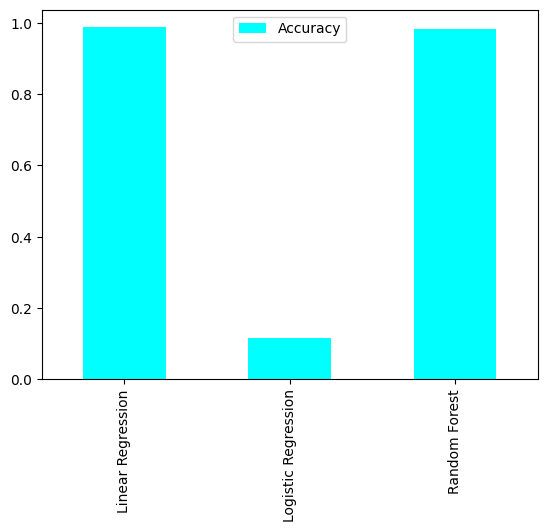

In [225]:
model_compare = pd.DataFrame(df_score, index=['Accuracy'])
model_compare.T.plot(kind="bar", color="cyan");

In [200]:
# Hyperparameter tuning for randomforest regression
para_dist = {
     "n_estimators": np.arange(100, 1000, 50),
    "max_depth": [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

random_regression = RandomizedSearchCV(
                                    estimator=RandomForestRegressor(),
                                    param_distributions=para_dist,
                                    n_iter=10,
                                    cv=5,
                                    verbose=2
                                )

random_regression.fit(X_train, y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=350; total time=   1.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=350; total time=   1.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=350

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   verbose=2)

In [214]:
random_regression.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': None}

In [215]:
random_regression.score(X_test, y_test)

0.9863249569545642

In [216]:
y_pred = random_regression.predict(X_test)

In [246]:
# calculate accuracy and score
def get_accuracy_and_score(y_test, y_pred):
    score = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    ajdusted_r2 = 1 - (1-score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1]-1)
    
    print(f"R2 Accuracy score {score*100:.2f}%")
    print(f"Mean Square Error {mse*1000:.2f}%")
    print(f"Mean Absolute Error {mae*100:.2f}%")
    print(f"Root Mean Square Error {rmse*100:.2f}%")
    print(f"Adjusted R Square Error {ajdusted_r2*100:.2f}%")

    

In [248]:
get_accuracy_and_score(y_test, y_pred)

R2 Accuracy score 98.63%
Mean Square Error 5067.77%
Mean Absolute Error 180.38%
Root Mean Square Error 225.12%
Adjusted R Square Error 98.63%


#### Save and Load data

In [249]:
import pickle
with open("student_study_performance.pkl", 'wb') as file:
    pickle.dump(random_regression, file)

In [250]:
# load data
with open("student_study_performance.pkl", "rb") as file:
    loaded_pk_model = pickle.load(file)

In [273]:
pickle_y_preds = loaded_pk_model.predict(X_test)
get_accuracy_and_score(y_test, pickle_y_preds)

R2 Accuracy score 98.63%
Mean Square Error 5067.77%
Mean Absolute Error 180.38%
Root Mean Square Error 225.12%
Adjusted R Square Error 98.63%


In [274]:
loaded_pk_model.predict(scaler.transform([[7, 75, 8]]))

D:\machine-learning\ml-with-krish\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([67.54001189])

In [264]:
pickle.dump(scaler, open("scaler.pkl", 'wb'))

In [275]:
df.head(10)

,study_hour,previus_score,sleep_hours,performance
0,7,99,9,91
1,4,82,4,65
2,8,51,7,45
3,5,52,5,36
4,7,75,8,66
5,3,78,9,61
6,7,73,5,63
7,8,45,4,42
8,5,77,8,61
9,4,89,4,69


In [272]:
random_regression.predict(scaler.transform([[7, 75, 8]]))

D:\machine-learning\ml-with-krish\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([67.54001189])

In [261]:
df['previus_score'].max()

9

In [ ]:
X_test